### Problem Statement -
Build your own recommendation system for products on an e-commerce website like Amazon.com.

Please do the analysis based on steps( 1 to 8) as given below -
Steps -
1. Read and explore the given dataset. ( Rename column/add headers, plot histograms,
find data characteristics)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the
users only who has given 50 or more number of ratings )
3. Build Popularity Recommender model.
4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
5. Build Collaborative Filtering model.
6. Evaluate the above model. ( Once the model is trained on the training data, it can be
used to compute the error (like RMSE) on predictions made on the test data.) You can
also use a different method to evaluate the models.
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to
each user based on his/her habits, we will recommend 5 new products.
8. Summarise your insights.

In [35]:
pip install scikit-surprise

     |████████████████████████████████| 6.5MB 4.5MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678225 sha256=c9203f59936e16ccdae1ab0497d1062405852e8824a9c87aea9f9798f561dd7e
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
#elec_df = pd.read_csv("ratings_Electronics.csv", memory_map=True, names=['userId', 'productId', 'ratings', 'timestamp'])

In [6]:
from google.colab import drive
elec_df = drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
elec_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset/ratings_Electronics.csv", names=['userId', 'productId', 'ratings', 'timestamp'])

In [8]:
elec_df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [0]:
elec_df_tmp = elec_df.drop('timestamp', axis=1)

In [10]:
elec_df_tmp.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [11]:
elec_df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [70]:
print("1. Column 'userId' and 'productId' are categorical but 'ratings' is of 'float' type")
print("2. We should not convert 'ratings' to a categorical variable s we need to perform some mathematical operations on it")
print("3. There seems to be no missing values")

1. Column 'userId' and 'productId' are categorical but 'ratings' is of 'float' type
2. We should not convert 'ratings' to a categorical variable s we need to perform some mathematical operations on it
3. There seems to be no missing values


In [14]:
elec_df_tmp.describe(include='all')

,userId,productId,ratings
count,7824482,7824482,7.824482e+06
unique,4201696,476002,NaN
top,A5JLAU2ARJ0BO,B0074BW614,NaN
freq,520,18244,NaN
mean,NaN,NaN,4.012337e+00
std,NaN,NaN,1.380910e+00
min,NaN,NaN,1.000000e+00
25%,NaN,NaN,3.000000e+00
50%,NaN,NaN,5.000000e+00
75%,NaN,NaN,5.000000e+00


In [15]:
print("1. There seems to be high number of duplicate 'userId' and 'productId'")
print("2. 'A5JLAU2ARJ0BO' has rated the Amazon products most of the times")
print("3. Amazon product 'B0074BW614' has been rated the most of the times")
print("4. Most of the Amazon products have been rated with a '5 star' rating")

1. There seems to be high number of duplicate 'userId' and 'productId'
2. 'A5JLAU2ARJ0BO' has rated the Amazon products most of the times
3. Amazon product 'B0074BW614' has been rated the most of the times
4. Most of the Amazon products have been rated with a '5 star' rating


In [16]:
# Let's check for the missing values
elec_df_tmp.isna().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [17]:
print("There are no missing values")

There are no missing values


In [18]:
elec_df_tmp['ratings'].unique()

array([5., 1., 3., 2., 4.])

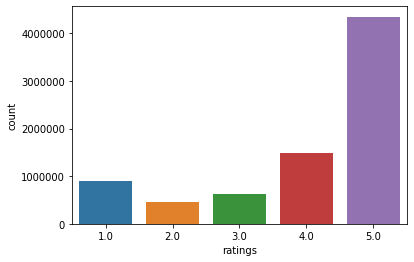

In [19]:
# Let's check distribution of other types in the data set
sns.countplot(elec_df_tmp['ratings'])
plt.show()

In [20]:
# Keep only those users who as rated atleast 50 products
counts1 = elec_df_tmp['userId'].value_counts()
elec_df_ratings = elec_df_tmp[elec_df_tmp['userId'].isin(counts1[counts1 >= 50].index)]
elec_df_ratings.head()

,userId,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [21]:
print("Original Data: {0}".format(elec_df_tmp.shape))
print("Densed Data: {0}".format(elec_df_ratings.shape))

Original Data: (7824482, 3)
Densed Data: (125871, 3)


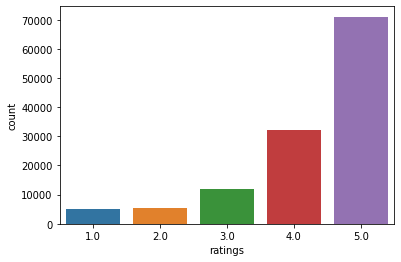

In [22]:
# Let's check distribution of other types in the data set
sns.countplot(elec_df_ratings['ratings'])
plt.show()

### Popularity Based Recommendation Model

In [23]:
#Count of ratings for each unique product as recommendation score 
elec_df_ratingsgrouped = elec_df_ratings.groupby('productId').agg({'ratings': 'mean'}).reset_index()
elec_df_ratingsgrouped.rename(columns = {'ratings': 'Avg_rating'},inplace=True)
elec_df_ratingsgrouped['rating_count'] = elec_df_ratings.groupby('productId')['ratings'].count().reset_index()['ratings']
elec_df_ratingsgrouped['score'] = elec_df_ratingsgrouped['Avg_rating'] * elec_df_ratingsgrouped['rating_count']
elec_df_ratingsgrouped.head()

,productId,Avg_rating,rating_count,score
0,0594451647,5.000000,1,5.0
1,0594481813,3.000000,1,3.0
2,0970407998,2.500000,2,5.0
3,0972683275,4.750000,4,19.0
4,1400501466,3.333333,6,20.0


In [24]:
#Sort the Products on recommendation score 
elec_df_ratings_sort = elec_df_ratingsgrouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
elec_df_ratings_sort['Rank'] = elec_df_ratings_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = elec_df_ratings_sort.head(5) 

print("Top 5 Popularity Based Recommedation")
print(popularity_recommendations)

Top 5 Popularity Based Recommedation
        productId  Avg_rating  rating_count  score  Rank
24827  B003ES5ZUU    4.864130           184  895.0   1.0
39003  B0088CJT4U    4.218447           206  869.0   2.0
11078  B000N99BBC    4.772455           167  797.0   3.0
38250  B007WTAJTO    4.701220           164  771.0   4.0
38615  B00829TIEK    4.436242           149  661.0   5.0


#### Use popularity based recommender model to make predictions

In [0]:
def recommend(userId):     
    user_recommendations = popularity_recommendations 
          
    # Add userId column for which the recommendations to be given
    user_recommendations['userId'] = userId 
      
    # Bring userId column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [26]:
users = ["A3BY5KCNQZXV5U", "AT09WGFUM934H", "A32HSNCNPRUMTR"]
for userId in users:
    print("Here is the recommendation for the User Id: {0}".format(userId))
    print()
    print(recommend(userId))    
    print() 

Here is the recommendation for the User Id: A3BY5KCNQZXV5U

               userId   productId  Avg_rating  rating_count  score  Rank
24827  A3BY5KCNQZXV5U  B003ES5ZUU    4.864130           184  895.0   1.0
39003  A3BY5KCNQZXV5U  B0088CJT4U    4.218447           206  869.0   2.0
11078  A3BY5KCNQZXV5U  B000N99BBC    4.772455           167  797.0   3.0
38250  A3BY5KCNQZXV5U  B007WTAJTO    4.701220           164  771.0   4.0
38615  A3BY5KCNQZXV5U  B00829TIEK    4.436242           149  661.0   5.0

Here is the recommendation for the User Id: AT09WGFUM934H

              userId   productId  Avg_rating  rating_count  score  Rank
24827  AT09WGFUM934H  B003ES5ZUU    4.864130           184  895.0   1.0
39003  AT09WGFUM934H  B0088CJT4U    4.218447           206  869.0   2.0
11078  AT09WGFUM934H  B000N99BBC    4.772455           167  797.0   3.0
38250  AT09WGFUM934H  B007WTAJTO    4.701220           164  771.0   4.0
38615  AT09WGFUM934H  B00829TIEK    4.436242           149  661.0   5.0

Here is t

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [27]:
print("1. We can observe that above model is recommending same products for all the users")
print("2. It will recommend same product irrespective of the user because above model was a popularity based model")
print("3. Recommendation can't be personalized using Popularity based recommendation models")

1. We can observe that above model is recommending same products for all the users
2. It will recommend same product irrespective of the user because above model was a popularity based model
3. Recommendation can't be personalized using Popularity based recommendation models


### Collborative Filtering Based Recommendation Model

In [0]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [0]:
# Load the existing Data Frame in format - user::item::ratings
reader = Reader(rating_scale=(1, 5))
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(elec_df_ratings[['userId', 'productId', 'ratings']], reader)
trainset, testset = train_test_split(data, test_size=.30)

In [47]:
# Use User-based collaborative filtering as computation is optimized
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [0]:
# Predictions
predictions = algo.test(testset)

In [49]:
predictions

[Prediction(uid='A3J8A5L5AF5TX9', iid='B0002WPSBC', r_ui=5.0, est=3.982770648352242, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A84FLVDK2R5JF', iid='B005VTIMEQ', r_ui=4.0, est=3.9816131092343032, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A2XU6J41ZQOJ2V', iid='B0009VT9OS', r_ui=5.0, est=4.325874125874126, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A2SH6A32BE6NEV', iid='B0088CJT4U', r_ui=5.0, est=4.267519750176942, details={'actual_k': 19, 'was_impossible': False}),
 Prediction(uid='A3KCETSIJNOK56', iid='B003VWU79I', r_ui=4.0, est=3.8157894736842106, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1JBEKU5TYIWE7', iid='B004286VMW', r_ui=5.0, est=4.514285714285714, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1901NTE8LFJF6', iid='B002JQNXZC', r_ui=5.0, est=3.909090909090909, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1ODOGXEYECQQ8', iid='B001QFY

In [71]:
# get RMSE and MAE
print("User-based Model : Test Set")
accuracy.rmse(predictions, verbose=True)
accuracy.mae(predictions, verbose=True)

User-based Model : Test Set
RMSE: 1.0563
MAE:  0.7777


0.7776502162563851

In [66]:
# Recommend Top 5 new products to a user - 'A3J8A5L5AF5TX9'
predection_df = pd.DataFrame(predictions)
recommendations = predection_df[predection_df.uid=='A3J8A5L5AF5TX9'].sort_values(by='est', ascending=False)
recommendations.head()

,uid,iid,r_ui,est,details
26587,A3J8A5L5AF5TX9,B00CTUIT20,5.0,4.633333,"{'actual_k': 1, 'was_impossible': False}"
12378,A3J8A5L5AF5TX9,B0089ZV1WY,5.0,4.495652,"{'actual_k': 1, 'was_impossible': False}"
3676,A3J8A5L5AF5TX9,B0002MQGOA,5.0,4.483673,"{'actual_k': 1, 'was_impossible': False}"
10237,A3J8A5L5AF5TX9,B009G9PWMC,2.0,4.261369,"{'was_impossible': True, 'reason': 'User and/o..."
20493,A3J8A5L5AF5TX9,B000VAIMF4,4.0,4.261369,"{'was_impossible': True, 'reason': 'User and/o..."


In [67]:
recommendations.head(10)

,uid,iid,r_ui,est,details
26587,A3J8A5L5AF5TX9,B00CTUIT20,5.0,4.633333,"{'actual_k': 1, 'was_impossible': False}"
12378,A3J8A5L5AF5TX9,B0089ZV1WY,5.0,4.495652,"{'actual_k': 1, 'was_impossible': False}"
3676,A3J8A5L5AF5TX9,B0002MQGOA,5.0,4.483673,"{'actual_k': 1, 'was_impossible': False}"
10237,A3J8A5L5AF5TX9,B009G9PWMC,2.0,4.261369,"{'was_impossible': True, 'reason': 'User and/o..."
20493,A3J8A5L5AF5TX9,B000VAIMF4,4.0,4.261369,"{'was_impossible': True, 'reason': 'User and/o..."
14977,A3J8A5L5AF5TX9,B001T9EYGC,4.0,4.261369,"{'was_impossible': True, 'reason': 'User and/o..."
13982,A3J8A5L5AF5TX9,B000LUE73U,4.0,4.261369,"{'was_impossible': True, 'reason': 'User and/o..."
13287,A3J8A5L5AF5TX9,B001O3OSIM,5.0,4.261369,"{'was_impossible': True, 'reason': 'User and/o..."
24050,A3J8A5L5AF5TX9,B002VBW18U,4.0,4.261369,"{'was_impossible': True, 'reason': 'User and/o..."
32831,A3J8A5L5AF5TX9,B002TWEKD0,1.0,4.261369,"{'was_impossible': True, 'reason': 'User and/o..."


In [69]:
print("1. We can see there are many Products for which ratings cannot be predicted. Therefore, default rating has been assigned.")
print("2. We have 'was_impossible': True for many of the above predictions means there is a 'Cold Start' problem in dataset")
print("3. Providing recommendations to users with small past history becomes a difficult problem for CF models because their learning and predictive ability is limited")

1. We can see there are many Products for which ratings cannot be predicted. Therefore, default rating has been assigned.
2. We have 'was_impossible': True for many of the above predictions means there is a 'Cold Start' problem in dataset
3. Providing recommendations to users with small past history becomes a difficult problem for CF models because their learning and predictive ability is limited
